In [82]:
#manipulacion de datos 
import geopandas 
import pandas as pd
import numpy as np
from scipy import stats


#visualizacion 
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')

#visualizacion de mapa.
import contextily as ctx


#utiles
import datetime
import functools



In [66]:
#Censo con geometria
df_MINDC17 = geopandas.read_file("Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Identificación_Geográfica/R14/MANZANA_IND_C17.shp")
print(df_MINDC17.keys())
df_MINDC17.head()

Index(['REGION', 'NOM_REGION', 'PROVINCIA', 'NOM_PROVIN', 'COMUNA',
       'NOM_COMUNA', 'DISTRITO', 'LOC_ZON', 'ENT_MAN', 'CATEGORIA',
       'NOM_CATEGO', 'MANZENT_I', 'TOTAL_PERS', 'TOTAL_VIVI', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry'],
      dtype='object')


,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,DISTRITO,LOC_ZON,ENT_MAN,CATEGORIA,NOM_CATEGO,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,SHAPE_Leng,SHAPE_Area,geometry
0,14,REGIÓN DE LOS RÍOS,141,VALDIVIA,14101,VALDIVIA,4,5,3,1,CD,14101041005003,610,200,0.103644,0.000066,POLYGON ((-73.21896630199996 -39.7883215089999...
1,14,REGIÓN DE LOS RÍOS,141,VALDIVIA,14101,VALDIVIA,5,1,801,1,CD,14101051001801,30,34,0.042985,0.000039,(POLYGON ((-73.20259282699993 -39.792899167999...
2,14,REGIÓN DE LOS RÍOS,141,VALDIVIA,14101,VALDIVIA,4,5,2,1,CD,14101041005002,53,18,0.007727,0.000002,POLYGON ((-73.21784338499998 -39.7881180649999...
3,14,REGIÓN DE LOS RÍOS,141,VALDIVIA,14101,VALDIVIA,4,1,7,1,CD,14101041001007,234,113,0.040701,0.000027,POLYGON ((-73.21420134599998 -39.8086181919999...
4,14,REGIÓN DE LOS RÍOS,141,VALDIVIA,14101,VALDIVIA,4,5,5,1,CD,14101041005005,70,18,0.024171,0.000009,POLYGON ((-73.22557192399995 -39.7895726699999...


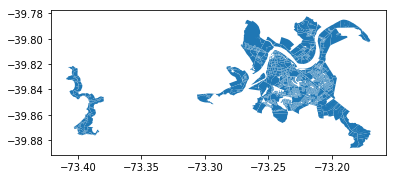

In [83]:
#Se filtran los datos para valdivia = Comuna 14101 y se genera indice de tipo int. 
df_MINDC17 = df_MINDC17[df_MINDC17['COMUNA']=='14101']
df_MINDC17['id_manz'] = df_MINDC17.apply(lambda row: int(row['MANZENT_I']) , axis=1)
df_MINDC17 = df_MINDC17.set_index('id_manz')
df_MINDC17.plot()

In [84]:
#Informacion censal 
df_manz = pd.read_csv("Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas.csv", sep=";")
df_manz.head()

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,MZ_ENT,ID_ZONA_LOC,ID_MANZENT,PERSONAS,...,MATREC,MATIRREC,P05_1,P05_2,P05_3,P05_4,REGION_15R,PROVINCIA_15R,COMUNA_15R,ID_MANZENT_15R
0,1,11,1101,1,1,1,1,7849,1101011001001,15,...,0,0,0,0,0,0,1,11,1101,1101011001001
1,1,11,1101,1,1,1,10,7849,1101011001010,70,...,1,0,15,0,0,0,1,11,1101,1101011001010
2,1,11,1101,1,1,1,11,7849,1101011001011,36,...,5,0,15,0,0,0,1,11,1101,1101011001011
3,1,11,1101,1,1,1,12,7849,1101011001012,65,...,9,4,24,0,0,0,1,11,1101,1101011001012
4,1,11,1101,1,1,1,13,7849,1101011001013,39,...,0,0,9,0,0,0,1,11,1101,1101011001013


In [89]:
#Se filtra comuna valdivia = 14101
df_lr = df_manz[df_manz['COMUNA']==14101]
df_lr['id_manz'] = df_lr['ID_MANZENT']
df_lr = df_lr.set_index('id_manz')
print(df_lr.keys())
df_lr

Index(['REGION', 'PROVINCIA', 'COMUNA', 'DC', 'AREA', 'ZC_LOC', 'MZ_ENT',
       'ID_ZONA_LOC', 'ID_MANZENT', 'PERSONAS', 'HOMBRES', 'MUJERES',
       'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS', 'INMIGRANTES',
       'PUEBLO', 'VIV_PART', 'VIV_COL', 'VPOMP', 'TOTAL_VIV', 'CANT_HOG',
       'P01_1', 'P01_2', 'P01_3', 'P01_4', 'P01_5', 'P01_6', 'P01_7', 'P03A_1',
       'P03A_2', 'P03A_3', 'P03A_4', 'P03A_5', 'P03A_6', 'P03B_1', 'P03B_2',
       'P03B_3', 'P03B_4', 'P03B_5', 'P03B_6', 'P03B_7', 'P03C_1', 'P03C_2',
       'P03C_3', 'P03C_4', 'P03C_5', 'MATACEP', 'MATREC', 'MATIRREC', 'P05_1',
       'P05_2', 'P05_3', 'P05_4', 'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R',
       'ID_MANZENT_15R'],
      dtype='object')


/home/gabriela/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,MZ_ENT,ID_ZONA_LOC,ID_MANZENT,PERSONAS,...,MATREC,MATIRREC,P05_1,P05_2,P05_3,P05_4,REGION_15R,PROVINCIA_15R,COMUNA_15R,ID_MANZENT_15R
id_manz,,,,,,,,,,,,,,,,,,,,,
14101011001010,14,141,14101,1,1,1,10,14912,14101011001010,80,...,2,0,17,0,0,0,14,141,14101,14101011001010
14101011001011,14,141,14101,1,1,1,11,14912,14101011001011,52,...,2,0,19,0,0,0,14,141,14101,14101011001011
14101011001012,14,141,14101,1,1,1,12,14912,14101011001012,334,...,25,6,106,0,0,0,14,141,14101,14101011001012
14101011001013,14,141,14101,1,1,1,13,14912,14101011001013,59,...,0,1,7,0,0,0,14,141,14101,14101011001013
14101011001014,14,141,14101,1,1,1,14,14912,14101011001014,19,...,1,2,6,0,0,0,14,141,14101,14101011001014
14101011001015,14,141,14101,1,1,1,15,14912,14101011001015,0,...,0,0,0,0,0,0,14,141,14101,14101011001015
14101011001016,14,141,14101,1,1,1,16,14912,14101011001016,36,...,0,0,20,0,0,0,14,141,14101,14101011001016
14101011001018,14,141,14101,1,1,1,18,14912,14101011001018,43,...,0,0,24,0,0,0,14,141,14101,14101011001018
14101011001019,14,141,14101,1,1,1,19,14912,14101011001019,13,...,0,0,0,0,0,0,14,141,14101,14101011001019


1728
1601


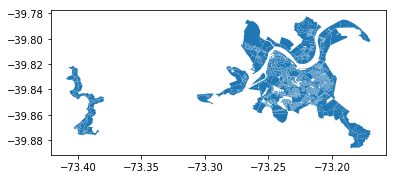

In [88]:
#Se unen la capa de geometria con la información censal. 
result = pd.concat([df_lr, df_MINDC17], axis=1, sort=False)
print(len(result))
result = result.dropna()
print(len(result))
gdfResult = geopandas.GeoDataFrame(result)
gdfResult.plot()